In [1]:
from scipy import *
from astropy.io import fits
import WLanalysis

In [2]:
conv_massive = fits.open('sample_maps/mnv0.10000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data
conv_massles = fits.open('sample_maps/mnv0.00000_om0.30000_As2.1000/WLconv_z1100.00_0001r.fits')[0].data

In [3]:
GRF = WLanalysis.GRF_Gen_1map(conv_massles)

/Users/jia/Documents/code/CFHTLens_analysis/jia/WLanalysis.py:514: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if edges == None:


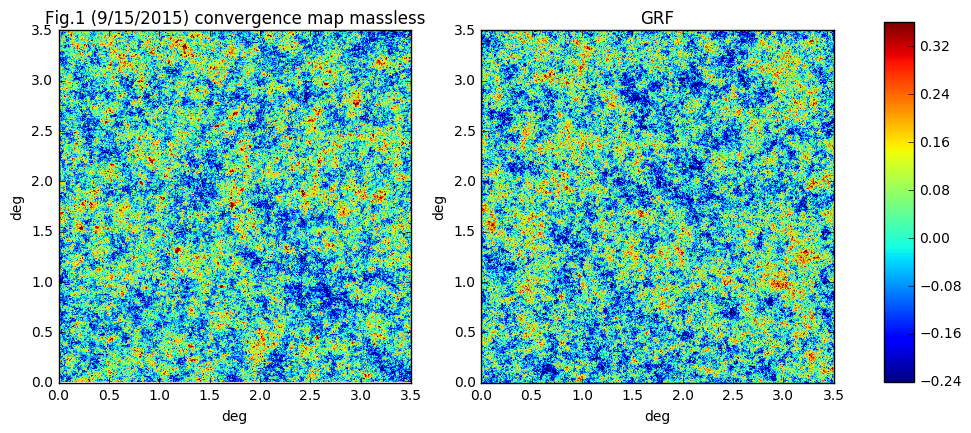

In [4]:
istd = std(conv_massive)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(conv_massles,extent=[0,3.5, 0,3.5],vmin=-2*istd, vmax=3*istd)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.1 (9/15/2015) convergence map massless')

clb2=ax2.imshow(GRF,extent=[0,3.5, 0,3.5],vmin=-2*istd, vmax=3*istd)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('GRF')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

In [13]:
ell, ps_NG = WLanalysis.PowerSpectrum(conv_massles, sizedeg = 3.5**2)
ell, ps_GRF = WLanalysis.PowerSpectrum(GRF, sizedeg = 3.5**2)

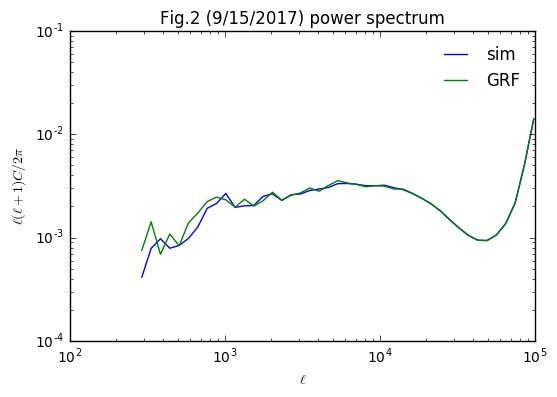

In [14]:
loglog(ell, ps_NG, label='sim')
loglog(ell, ps_GRF, label='GRF')
legend(frameon=0,loc=0)
xlabel(r'$\ell$')
ylabel(r'$\ell(\ell+1)C/2\pi$')
title('Fig.2 (9/15/2017) power spectrum')
show()

In [24]:
kmap_NG_smooth = WLanalysis.smooth(conv_massles, 2048./3.5/60 *5)
kmap_GRF_smooth = WLanalysis.smooth(GRF, 2048./3.5/60 *5)

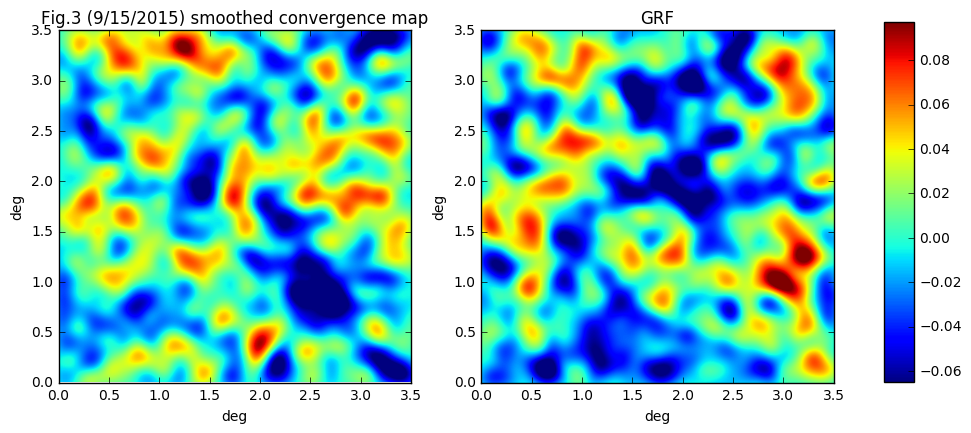

In [25]:
istdsmooth = std(kmap_NG_smooth)

f=figure(figsize=(10,6))
ax1=f.add_subplot(121)
ax2=f.add_subplot(122)

clb1=ax1.imshow(kmap_NG_smooth,extent=[0,3.5, 0,3.5],vmin=-2*istdsmooth, vmax=3*istdsmooth)
ax1.set_xlabel('deg')
ax1.set_ylabel('deg')
ax1.set_title('Fig.3 (9/15/2015) smoothed convergence map')

clb2=ax2.imshow(kmap_GRF_smooth,extent=[0,3.5, 0,3.5],vmin=-2*istdsmooth, vmax=3*istdsmooth)
ax2.set_xlabel('deg')
ax2.set_ylabel('deg')
ax2.set_title('GRF')

cbar_ax = f.add_axes([0.95, 0.22, 0.03, 0.6])
f.colorbar(clb2, cax=cbar_ax)
show()

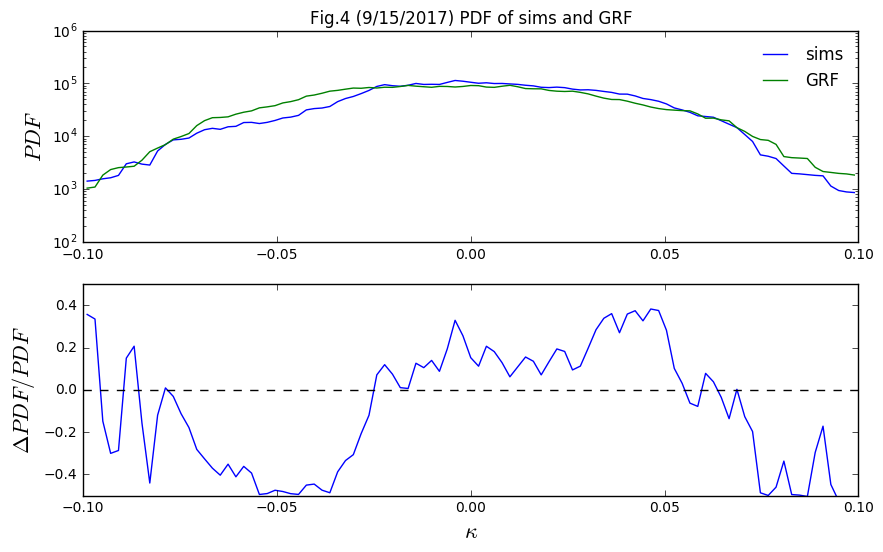

In [27]:
imax=0.1
histbins=linspace(-imax,imax,100)
halfstep=0.5*(histbins[1]-histbins[0])
hist_NG = histogram(kmap_NG_smooth.flatten(),bins=histbins)[0]
hist_GRF = histogram(kmap_GRF_smooth.flatten(),bins=histbins)[0]
f=figure(figsize=(10,6))
ax1=f.add_subplot(211)
ax1.set_title('Fig.4 (9/15/2017) PDF of sims and GRF')
ax1.plot(histbins[:-1]+halfstep, hist_NG,label='sims')
ax1.plot(histbins[:-1]+halfstep, hist_GRF,label='GRF')
ax1.legend(loc=0, frameon=0)
ax1.set_ylabel('$PDF$',fontsize=16)
ax1.set_yscale('log')
ax1.set_xlim(-imax,imax)
#ax1.set_ylim(100, 1e6)
ax2=f.add_subplot(212)
ax2.plot(histbins[:-1]+halfstep,hist_NG.astype(float)/hist_GRF-1.0,label='GRF')
ax2.plot([-imax,imax],[0,0],'k--')
ax2.set_xlabel(r'$\kappa$',fontsize=16)
ax2.set_ylabel(r'$\Delta PDF/PDF$',fontsize=16)
ax2.set_xlim(-imax,imax)
ax2.set_ylim(-0.5,0.5)
show()